Notebook for plotting the results of the study

First, we load the data and we structure it in a nested dictionary

In [1]:
import pickle
results = {}

for N in [5, 10, 25]:
    results[N] = {}
    for method in ['td2c', 'td2c_cmiknn', 'pcmci', 'granger', 'dyno', 'varlingam']:
        results[N][f'{method}'] = {}
        if method == 'varlingam' and N == 25: #computational issues
            results[N][f'{method}']['roc'] = results[N][f'dyno']['roc']
            results[N][f'{method}']['precision'] = results[N][f'dyno']['roc']
            results[N][f'{method}']['recall'] = results[N][f'dyno']['roc']
            results[N][f'{method}']['f1'] = results[N][f'dyno']['roc']
        
        else:
            with open(f'journal_results_{method}_N{N}.pkl', 'rb') as f:
                rocs, precision, recall, f1 = pickle.load(f)
            results[N][f'{method}']['roc'] = rocs 
            results[N][f'{method}']['precision'] = precision 
            results[N][f'{method}']['recall'] = recall
            results[N][f'{method}']['f1'] = f1 

In [26]:
import pickle
results = {}

for N in [5, 10, 25]:
    results[N] = {}
    for method in ['t2dc', 't2dc_cmiknn', 'pcmci', 'granger', 'dyno', 'varlingam']: #small naming issue for td2c
        if method == 'varlingam' and N == 25: #computational issues
            results[N][f'{method}_rocs'] = None
            results[N][f'{method}_precision'] = None 
            results[N][f'{method}_recall'] = None
            results[N][f'{method}_f1'] = None
        else:
            with open(f'journal_results_{method}_N{N}.pkl', 'rb') as f:
                rocs, precision, recall, f1 = pickle.load(f)
            results[N][f'{method}_rocs'] = rocs
            results[N][f'{method}_precision'] = precision
            results[N][f'{method}_recall'] = recall
            results[N][f'{method}_f1'] = f1

Old version of D2C

In [15]:
results[5]['t2dc_rocs'][10]

{0: 0.4903846153846154,
 1: 0.7988505747126436,
 2: 0.53258547008547,
 3: 0.4001210653753026,
 4: 0.7863247863247862,
 5: 0.3978260869565218,
 6: 0.4776029055690072,
 7: 0.8092948717948718,
 8: 0.4636752136752137,
 9: 0.7066666666666667,
 10: 0.5042372881355932,
 11: 0.32263922518159804,
 12: 0.30333333333333334,
 13: 0.8777239709443099,
 14: 0.7581417624521073,
 15: 0.2759103641456583,
 16: 0.4698879551820728,
 17: 0.34961685823754785,
 18: 0.48717948717948717,
 19: 0.9508547008547009,
 20: 0.5714285714285715,
 21: 0.3433908045977011,
 22: 0.31840193704600483,
 23: 0.9262820512820513,
 24: 0.4001068376068376,
 25: 0.27884615384615385,
 26: 0.42251815980629537,
 27: 0.7380268199233716,
 28: 0.910411622276029,
 29: 0.423728813559322,
 30: 0.5181598062953995,
 31: 0.6083535108958837,
 32: 0.5035014005602241,
 33: 0.5952380952380952,
 34: 0.4155982905982906,
 35: 0.8071581196581196,
 36: 0.7825854700854701,
 37: 0.5014005602240896,
 38: 0.5763888888888888,
 39: 0.3819444444444444}

None
[0      0.918803
1      0.876916
2      0.901175
3      0.907990
4      0.915064
         ...   
715    1.000000
716    1.000000
717    1.000000
718    1.000000
719    1.000000
Length: 720, dtype: float64, 0      0.490385
1      0.798851
2      0.532585
3      0.400121
4      0.786325
         ...   
715    1.000000
716    1.000000
717    1.000000
718    1.000000
719    1.000000
Length: 720, dtype: float64, 0      0.575855
1      0.650383
2      0.536325
3      0.276029
4      0.389957
         ...   
715    0.821107
716    0.866474
717    0.817661
718    0.855212
719    0.819954
Length: 720, dtype: float64, 0      0.243590
1      0.324713
2      0.232906
3      0.182809
4      0.229701
         ...   
715    0.161519
716    0.115830
717    0.248853
718    0.234234
719    0.304472
Length: 720, dtype: float64, None]


TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

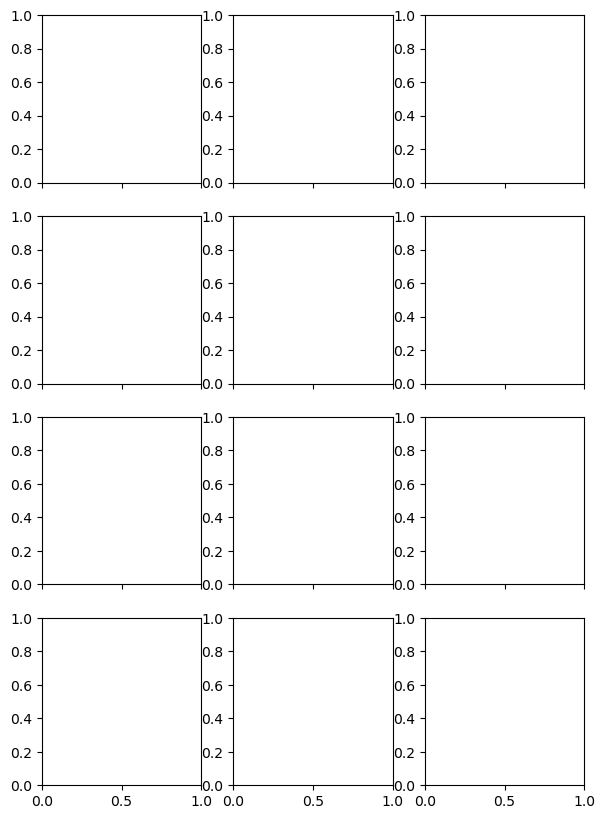

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a function to combine data for each method across all processes
def combine_data(data_dict, metric):
    combined_td2c_cmiknn = pd.concat([pd.Series(data_dict[f't2dc_cmiknn_{metric}'][proc]) for proc in data_dict[f't2dc_cmiknn_{metric}']], ignore_index=True)
    combined_td2c = pd.concat([pd.Series(data_dict[f't2dc_{metric}'][proc]) for proc in data_dict[f't2dc_{metric}']], ignore_index=True)
    combined_pcmci = pd.concat([pd.Series(data_dict[f'pcmci_{metric}'][proc]) for proc in data_dict[f'pcmci_{metric}']], ignore_index=True)
    print(data_dict[f'dyno_{metric}'][10][0])
    if data_dict[f'dyno_{metric}'][10][0] is not None:
        combined_dyno = pd.concat([pd.Series(data_dict[f'dyno_{metric}'][proc]) for proc in data_dict[f'dyno_{metric}']], ignore_index=True)
    else:
        combined_dyno = None
    if data_dict[f'varlingam_{metric}'] is not None:
        combined_varlingam = pd.concat([pd.Series(data_dict[f'varlingam_{metric}'][proc]) for proc in data_dict[f'varlingam_{metric}']], ignore_index=True)
    else:
        combined_varlingam = None
    combined_granger = pd.concat([pd.Series(data_dict[f'granger_{metric}'][proc]) for proc in data_dict[f'granger_{metric}']], ignore_index=True)

    # return [combined_td2c, combined_pcmci, combined_varlingam, combined_granger, combined_dyno]
    return [combined_td2c_cmiknn, combined_td2c, combined_pcmci, combined_granger, combined_dyno]

# Combine the data for each metric
metrics = ['rocs','precision', 'recall', 'f1']
y_label = ['ROC AUC','Precision', 'Recall', 'F1-score']

n_values = [results[5], results[10], results[25]]
n_labels = ['N=5', 'N=10', 'N=25']
# labels = ['TD2C', 'PCMCI', 'VARLINGAM', 'Granger','DYNOTEARS']
labels = ['TD2C - cmiknn', 'TD2C', 'PCMCI', 'VARLINGAM', 'Granger', 'DYNOTEARS']

# Create subplots
fig, axes = plt.subplots(len(metrics), len(n_values), figsize=(7, 10), sharex=True, sharey=False)
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
fontsize = 7

for i, metric in enumerate(metrics):
    for j, n_data in enumerate(n_values):

        combined_data = combine_data(n_data, metric)
        ax = axes[i, j]

        print(combined_data)

        # if metric == 'rocs':  # Handle empty DynoTears data for ROC AUC
        #     box = ax.boxplot(combined_data[:4], patch_artist=True, widths=0.3)
        #     ax.set_xticks(range(1, 5))
        #     ax.set_xticklabels(labels[:4], rotation=-90, fontsize=fontsize)
        # else:
        box = ax.boxplot(combined_data, patch_artist=True, widths=0.3)
        ax.set_xticks(range(1, len(labels) + 1))
        ax.set_xticklabels(labels, rotation=-90, fontsize=fontsize)
        
        for patch, color in zip(box['boxes'], colors):
            patch.set_facecolor(color)
        
        ax.set_xticks(range(1, len(labels) + 1))
        ax.set_xticklabels(labels, rotation=-90, fontsize=fontsize)
        if j == 0:
            ax.set_ylabel(y_label[i], fontsize=fontsize)
        if i == 0:
            ax.set_title(n_labels[j], fontsize=fontsize)
        ax.grid(True)

plt.tight_layout()
# plt.savefig('combined_metrics.pdf', format='pdf')
plt.show()


In [6]:
import sys
import os
import pandas as pd
import numpy as np

from d2c.benchmark.cd_plot import draw_cd_diagram


/home/gpaldino/miniconda3/envs/d2cpy/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Precision, recall, F1-Score

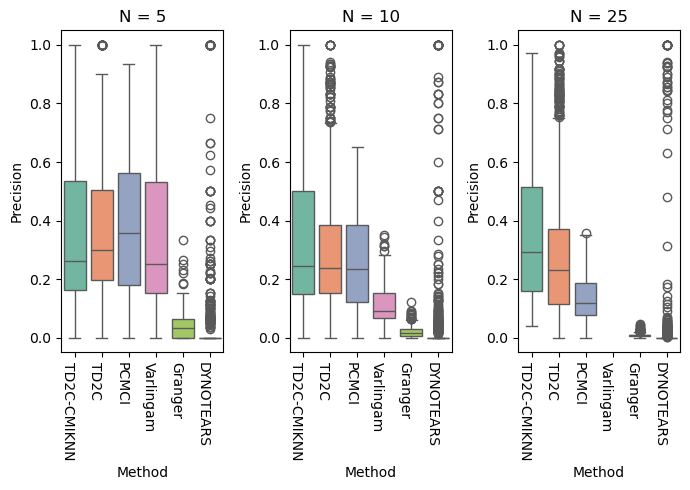

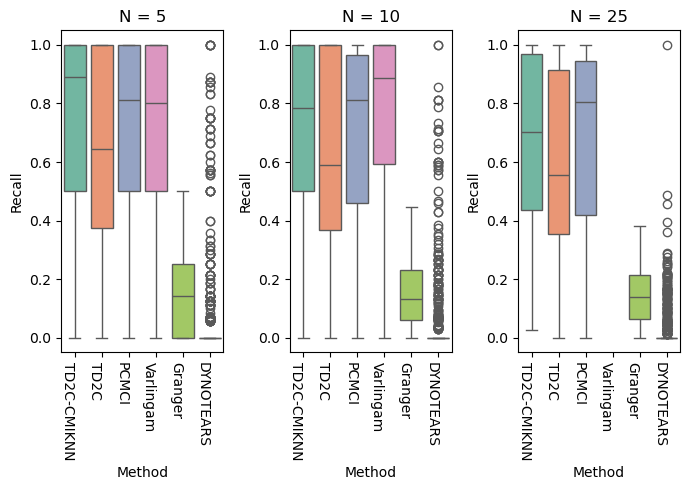

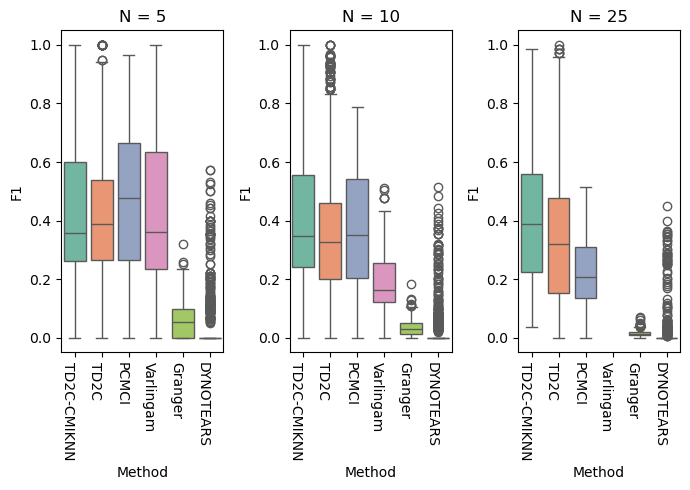

In [5]:
methods_other_metrics = ['td2c_cmiknn','td2c', 'pcmci', 'varlingam', 'granger', 'dyno']
other_metrics = ['precision', 'recall', 'f1']

my_palette = sns.color_palette('Set2', 6)  


for metric in other_metrics:
    metric_dict = {}
    for n_variables in number_of_variables:
        metric_dict[n_variables] = {}
        for method in methods_other_metrics:
            metric_dict[n_variables][method] = aggregate_results_for_all_processes(results, n_variables, method, metric, considered_processes)

    fig, axes = plt.subplots(1, 3, figsize=(7, 5), sharey=False)

    for ax_idx , n_variables in enumerate(number_of_variables):
        sns.boxplot(data=metric_dict[n_variables], ax=axes[ax_idx], palette=my_palette)

        axes[ax_idx].set_title(f'N = {n_variables}')
        axes[ax_idx].set_ylabel(metric.capitalize())
        axes[ax_idx].set_xlabel('Method')

        labels = ['TD2C-CMIKNN', 'TD2C', 'PCMCI', 'Varlingam', 'Granger', 'DYNOTEARS']
        axes[ax_idx].set_xticks(range(len(labels)))
        axes[ax_idx].set_xticklabels(labels, rotation=-90, horizontalalignment='right')


    plt.tight_layout()
    plt.savefig(f'figures/{metric}.png')

## Single process results

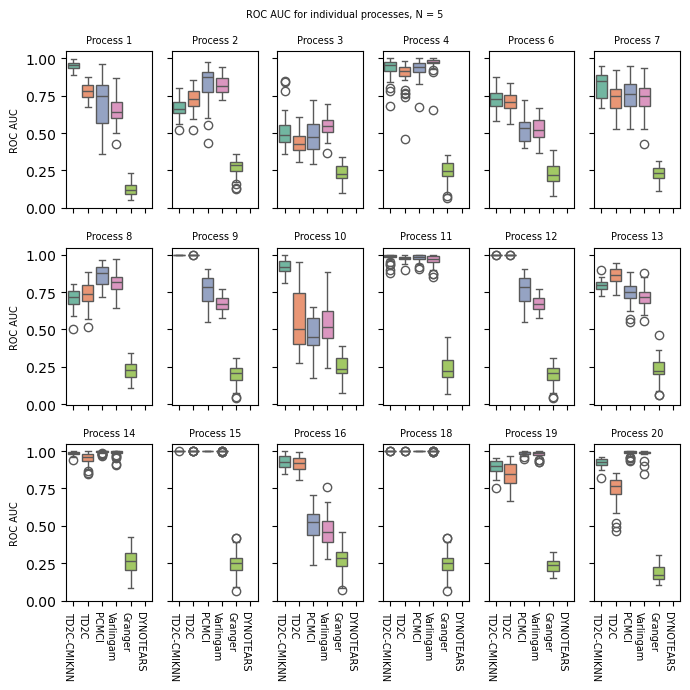

In [7]:
methods_other_metrics = ['td2c_cmiknn','td2c', 'pcmci', 'varlingam', 'granger', 'dyno']
other_metrics = ['precision', 'recall', 'f1']

my_palette = sns.color_palette('Set2', 6)  
fontsize = 7
fig, axes = plt.subplots(3, 6, figsize=(7, 7), sharey=True, sharex=True)
axes = axes.flatten()

N = 5
for process_index, process_id in enumerate(considered_processes):
    single_process_metric_dict = {}
    for method in methods_other_metrics:
            single_process_metric_dict[method] = aggregate_results_single_processes(results, N, method, 'roc', process_id)

    labels = ['TD2C-CMIKNN', 'TD2C', 'PCMCI', 'Varlingam', 'Granger', 'DYNOTEARS']

    axes[process_index].set_title(f'Process {process_id}', fontsize=fontsize)
    if process_index % 6 == 0:
        axes[process_index].set_ylabel('ROC AUC', fontsize=fontsize)
    axes[process_index].set_xticks(range(len(labels)))
    axes[process_index].set_xticklabels(labels, rotation=-90, horizontalalignment='right', fontsize=fontsize)
    sns.boxplot(data=single_process_metric_dict, ax=axes[process_index], palette=my_palette)


# title whole figure 
plt.suptitle(f'ROC AUC for individual processes, N = {N}', fontsize=fontsize)
plt.tight_layout()
plt.savefig(f'figures/processes/roc_auc_single_processes_N{N}.png')
plt.show()

In [14]:
import matplotlib.pyplot as plt

# Combine the data for each metric
metrics = ['roc','precision', 'recall', 'f1']
y_label = ['ROC AUC','Precision', 'Recall', 'F1-score']

n_variables = [5, 10, 25]
n_labels = ['N=5', 'N=10', 'N=25']
# labels = ['TD2C', 'PCMCI', 'VARLINGAM', 'Granger','DYNOTEARS']
labels = ['TD2C - cmiknn', 'TD2C', 'PCMCI', 'VARLINGAM', 'Granger', 'DYNOTEARS']

# Create subplots
fig, axes = plt.subplots(len(metrics), len(n_variables), figsize=(7, 10), sharex=True, sharey=False)
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
fontsize = 7

for i, metric in enumerate(metrics):
    for j, n_var in enumerate(n_variables):
        
        print(metric,n_var)
        ax = axes[i, j]


        data = {}
        for method in ['td2c', 'td2c_cmiknn', 'pcmci', 'granger', 'dyno', 'varlingam']:
            data[method] = list()
            data[method].extend([list(results[n_var][method][metric][process].values())
                            for process in results[n_var][method][metric]])
                             
        print(data)        

        filtered_data = {key: [val for val in data[key] if val is not None] for key in data}

        # Convert data to list of lists for boxplot
        data_values = [filtered_data[method] for method in filtered_data]

        print(filtered_data)        

        box = ax.boxplot(data_values, patch_artist=True, widths=0.3)
        ax.set_xticks(range(1, len(labels) + 1))
        ax.set_xticklabels(labels, rotation=-90, fontsize=fontsize)
        
        for patch, color in zip(box['boxes'], colors):
            patch.set_facecolor(color)
        
        ax.set_xticks(range(1, len(labels) + 1))
        ax.set_xticklabels(labels, rotation=-90, fontsize=fontsize)
        if j == 0:
            ax.set_ylabel(y_label[i], fontsize=fontsize)
        if i == 0:
            ax.set_title(n_labels[j], fontsize=fontsize)
        ax.grid(True)

plt.tight_layout()
# plt.savefig('combined_metrics.pdf', format='pdf')
plt.show()


roc 5
{'td2c': [[0.4903846153846154, 0.7988505747126436, 0.53258547008547, 0.4001210653753026, 0.7863247863247862, 0.3978260869565218, 0.4776029055690072, 0.8092948717948718, 0.4636752136752137, 0.7066666666666667, 0.5042372881355932, 0.32263922518159804, 0.30333333333333334, 0.8777239709443099, 0.7581417624521073, 0.2759103641456583, 0.4698879551820728, 0.34961685823754785, 0.48717948717948717, 0.9508547008547009, 0.5714285714285715, 0.3433908045977011, 0.31840193704600483, 0.9262820512820513, 0.4001068376068376, 0.27884615384615385, 0.42251815980629537, 0.7380268199233716, 0.910411622276029, 0.423728813559322, 0.5181598062953995, 0.6083535108958837, 0.5035014005602241, 0.5952380952380952, 0.4155982905982906, 0.8071581196581196, 0.7825854700854701, 0.5014005602240896, 0.5763888888888888, 0.3819444444444444], [0.9722222222222222, 0.9693486590038315, 0.969551282051282, 0.9794188861985471, 0.951388888888889, 0.9530434782608697, 0.9588377723970944, 0.9748931623931624, 0.9780982905982906, 

ValueError: X must have 2 or fewer dimensions

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a function to combine data for each method across all processes
def combine_data(data_dict, metric):
    combined_td2c_cmiknn = pd.concat([pd.Series(data_dict[f't2dc_cmiknn_{metric}'][proc]) for proc in data_dict[f't2dc_cmiknn_{metric}']], ignore_index=True)
    combined_td2c = pd.concat([pd.Series(data_dict[f't2dc_{metric}'][proc]) for proc in data_dict[f't2dc_{metric}']], ignore_index=True)
    combined_pcmci = pd.concat([pd.Series(data_dict[f'pcmci_{metric}'][proc]) for proc in data_dict[f'pcmci_{metric}']], ignore_index=True)
    print(data_dict[f'dyno_{metric}'][10][0])
    if data_dict[f'dyno_{metric}'][10][0] is not None:
        combined_dyno = pd.concat([pd.Series(data_dict[f'dyno_{metric}'][proc]) for proc in data_dict[f'dyno_{metric}']], ignore_index=True)
    else:
        combined_dyno = None
    if data_dict[f'varlingam_{metric}'] is not None:
        combined_varlingam = pd.concat([pd.Series(data_dict[f'varlingam_{metric}'][proc]) for proc in data_dict[f'varlingam_{metric}']], ignore_index=True)
    else:
        combined_varlingam = None
    combined_granger = pd.concat([pd.Series(data_dict[f'granger_{metric}'][proc]) for proc in data_dict[f'granger_{metric}']], ignore_index=True)

    # return [combined_td2c, combined_pcmci, combined_varlingam, combined_granger, combined_dyno]
    return [combined_td2c_cmiknn, combined_td2c, combined_pcmci, combined_granger, combined_dyno]


Old version of D2C

None
[0      0.918803
1      0.876916
2      0.901175
3      0.907990
4      0.915064
         ...   
715    1.000000
716    1.000000
717    1.000000
718    1.000000
719    1.000000
Length: 720, dtype: float64, 0      0.490385
1      0.798851
2      0.532585
3      0.400121
4      0.786325
         ...   
715    1.000000
716    1.000000
717    1.000000
718    1.000000
719    1.000000
Length: 720, dtype: float64, 0      0.575855
1      0.650383
2      0.536325
3      0.276029
4      0.389957
         ...   
715    0.821107
716    0.866474
717    0.817661
718    0.855212
719    0.819954
Length: 720, dtype: float64, 0      0.243590
1      0.324713
2      0.232906
3      0.182809
4      0.229701
         ...   
715    0.161519
716    0.115830
717    0.248853
718    0.234234
719    0.304472
Length: 720, dtype: float64, None]
None
[0      0.946873
1      0.948665
2      0.908842
3      0.901961
4      0.839359
         ...   
715    1.000000
716    1.000000
717    1.000000
718    1.000000
71

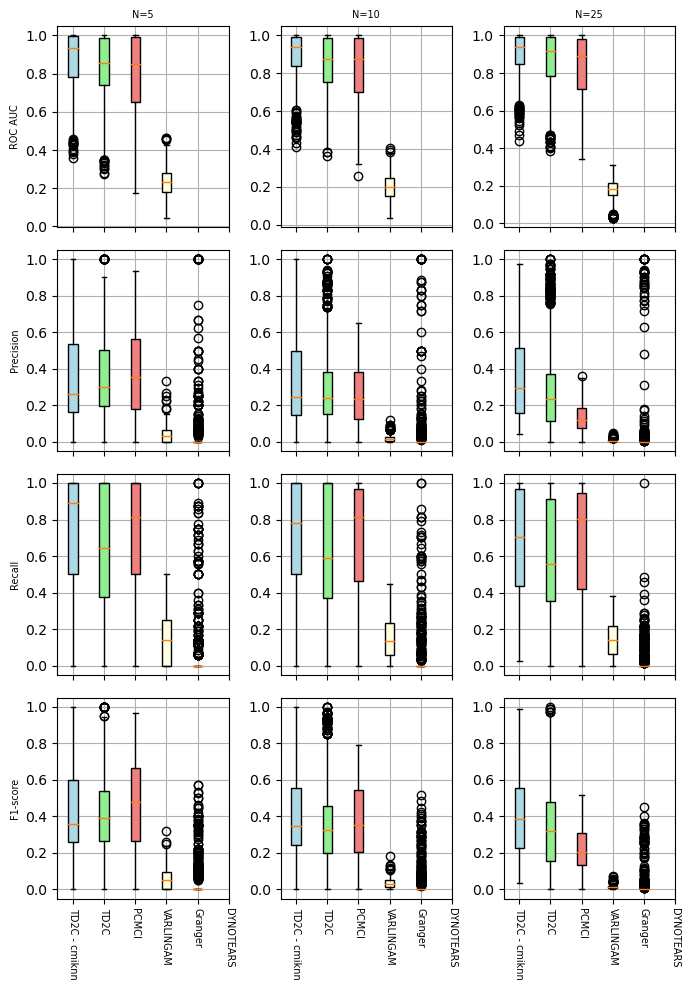

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a function to combine data for each method across all processes
def combine_data(data_dict, metric):
    combined_td2c_cmiknn = pd.concat([pd.Series(data_dict[f't2dc_cmiknn_{metric}'][proc]) for proc in data_dict[f't2dc_cmiknn_{metric}']], ignore_index=True)
    combined_td2c = pd.concat([pd.Series(data_dict[f't2dc_{metric}'][proc]) for proc in data_dict[f't2dc_{metric}']], ignore_index=True)
    combined_pcmci = pd.concat([pd.Series(data_dict[f'pcmci_{metric}'][proc]) for proc in data_dict[f'pcmci_{metric}']], ignore_index=True)
    print(data_dict[f'dyno_{metric}'][10][0])
    if data_dict[f'dyno_{metric}'][10][0] is not None:
        combined_dyno = pd.concat([pd.Series(data_dict[f'dyno_{metric}'][proc]) for proc in data_dict[f'dyno_{metric}']], ignore_index=True)
    else:
        combined_dyno = None
    if data_dict[f'varlingam_{metric}'] is not None:
        combined_varlingam = pd.concat([pd.Series(data_dict[f'varlingam_{metric}'][proc]) for proc in data_dict[f'varlingam_{metric}']], ignore_index=True)
    else:
        combined_varlingam = None
    combined_granger = pd.concat([pd.Series(data_dict[f'granger_{metric}'][proc]) for proc in data_dict[f'granger_{metric}']], ignore_index=True)

    # return [combined_td2c, combined_pcmci, combined_varlingam, combined_granger, combined_dyno]
    return [combined_td2c_cmiknn, combined_td2c, combined_pcmci, combined_granger, combined_dyno]

# Combine the data for each metric
metrics = ['rocs','precision', 'recall', 'f1']
y_label = ['ROC AUC','Precision', 'Recall', 'F1-score']

n_values = [results[5], results[10], results[25]]
n_labels = ['N=5', 'N=10', 'N=25']
# labels = ['TD2C', 'PCMCI', 'VARLINGAM', 'Granger','DYNOTEARS']
labels = ['TD2C - cmiknn', 'TD2C', 'PCMCI', 'VARLINGAM', 'Granger', 'DYNOTEARS']

# Create subplots
fig, axes = plt.subplots(len(metrics), len(n_values), figsize=(7, 10), sharex=True, sharey=False)
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
fontsize = 7

for i, metric in enumerate(metrics):
    for j, n_data in enumerate(n_values):

        combined_data = combine_data(n_data, metric)
        ax = axes[i, j]

        print(combined_data)

        if metric == 'rocs':  # Handle empty DynoTears data for ROC AUC
            box = ax.boxplot(combined_data[:4], patch_artist=True, widths=0.3)
            ax.set_xticks(range(1, 5))
            ax.set_xticklabels(labels[:4], rotation=-90, fontsize=fontsize)
        else:
            box = ax.boxplot(combined_data, patch_artist=True, widths=0.3)
            ax.set_xticks(range(1, len(labels) + 1))
            ax.set_xticklabels(labels, rotation=-90, fontsize=fontsize)
        
        for patch, color in zip(box['boxes'], colors):
            patch.set_facecolor(color)
        
        ax.set_xticks(range(1, len(labels) + 1))
        ax.set_xticklabels(labels, rotation=-90, fontsize=fontsize)
        if j == 0:
            ax.set_ylabel(y_label[i], fontsize=fontsize)
        if i == 0:
            ax.set_title(n_labels[j], fontsize=fontsize)
        ax.grid(True)

plt.tight_layout()
# plt.savefig('combined_metrics.pdf', format='pdf')
plt.show()
